In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('data/sushil bro/train_FD001.xlsx')

In [4]:
df.head()

,Unit,Time,Op1,Op2,Op3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


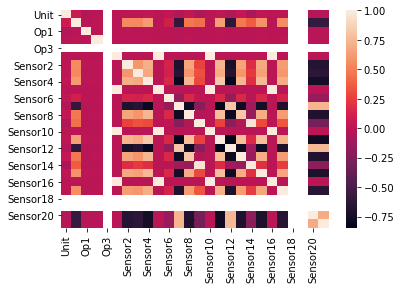

In [6]:
from scipy import integrate
import seaborn as sns
sns.heatmap(df.corr())

In [7]:
import numpy as np
output=np.loadtxt('data/sushil bro/RUL_TRAIN001.txt')

In [8]:
output=pd.DataFrame(output)

In [9]:
len(output)

20631

In [10]:
len(df)

20631

In [11]:
output

,0
0,191.0
1,190.0
2,189.0
3,188.0
4,187.0
...,...
20626,4.0
20627,3.0
20628,2.0
20629,1.0


In [12]:
new_df=pd.concat([df,output],axis=1)

In [13]:
new_df.rename(columns={0:'output'},inplace=True)

In [14]:
new_df.corr()['output'].sort_values(ascending=False)

output      1.000000e+00
Sensor12    6.719831e-01
Sensor7     6.572227e-01
Sensor21    6.356620e-01
Sensor20    6.294285e-01
Unit        7.875253e-02
Sensor5     1.561885e-14
Sensor1     1.535649e-14
Sensor10    1.414118e-14
Sensor16   -3.799205e-15
Op2        -1.947628e-03
Op1        -3.198458e-03
Sensor6    -1.283484e-01
Sensor14   -3.067689e-01
Sensor9    -3.901016e-01
Sensor13   -5.625688e-01
Sensor8    -5.639684e-01
Sensor3    -5.845204e-01
Sensor17   -6.061536e-01
Sensor2    -6.064840e-01
Sensor15   -6.426670e-01
Sensor4    -6.789482e-01
Sensor11   -6.962281e-01
Time       -7.362406e-01
Op3                  NaN
Sensor18             NaN
Sensor19             NaN
Name: output, dtype: float64

In [15]:
6.719831e-01

0.6719831

In [16]:
new_df.isnull().sum()#no null value

Unit        0
Time        0
Op1         0
Op2         0
Op3         0
Sensor1     0
Sensor2     0
Sensor3     0
Sensor4     0
Sensor5     0
Sensor6     0
Sensor7     0
Sensor8     0
Sensor9     0
Sensor10    0
Sensor11    0
Sensor12    0
Sensor13    0
Sensor14    0
Sensor15    0
Sensor16    0
Sensor17    0
Sensor18    0
Sensor19    0
Sensor20    0
Sensor21    0
output      0
dtype: int64

In [17]:
len(output)

20631

In [18]:
20631-2000

18631

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
train=new_df.iloc[:18631]
test=new_df.iloc[18631:]

In [21]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(train)

MinMaxScaler()

In [22]:
Train=minmax.transform(train)
Test=minmax.transform(test)

In [23]:
length=1200
batch=1

generator=TimeseriesGenerator(Train,Train,length=length,batch_size=batch)

val_generator=TimeseriesGenerator(Test,Test,length=length,batch_size=batch)

In [24]:
X,y=generator[0]

In [25]:
X

array([[[0.        , 0.        , 0.45977011, ..., 0.70866142,
         0.71966821, 0.52908587],
        [0.        , 0.00277008, 0.6091954 , ..., 0.66141732,
         0.72613525, 0.52631579],
        [0.        , 0.00554017, 0.25287356, ..., 0.62204724,
         0.61450865, 0.52354571],
        ...,
        [0.05494505, 0.22437673, 0.6091954 , ..., 0.43307087,
         0.38071137, 0.29362881],
        [0.05494505, 0.22714681, 0.51724138, ..., 0.41732283,
         0.34008154, 0.29085873],
        [0.05494505, 0.2299169 , 0.48275862, ..., 0.59055118,
         0.58231407, 0.28808864]]])

In [26]:
Train

array([[0.        , 0.        , 0.45977011, ..., 0.70866142, 0.71966821,
        0.52908587],
       [0.        , 0.00277008, 0.6091954 , ..., 0.66141732, 0.72613525,
        0.52631579],
       [0.        , 0.00554017, 0.25287356, ..., 0.62204724, 0.61450865,
        0.52354571],
       ...,
       [1.        , 0.31301939, 0.18390805, ..., 0.51968504, 0.72023056,
        0.62880886],
       [1.        , 0.31578947, 0.41954023, ..., 0.63779528, 0.62477155,
        0.62603878],
       [1.        , 0.31855956, 0.48275862, ..., 0.64566929, 0.65654436,
        0.6232687 ]])

In [27]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [28]:
Train.shape

(18631, 27)

In [34]:
model=Sequential()

model.add(LSTM(100,return_sequences=True,input_shape=(length,Train.shape[1])))

model.add(LSTM(100,return_sequences=True,input_shape=(length,Train.shape[1])))

model.add(LSTM(50,input_shape=(length,Train.shape[1])))

model.add(Dense(Train.shape[1]))

model.compile(loss='mse',optimizer='adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',patience=2,b)

In [45]:
model.fit(generator,batch_size=1,validation_data=val_generator,epochs=2,callbacks=[earlystop])

Epoch 1/2
    9/17431 [..............................] - ETA: 9:23:26 - loss: 0.0241

KeyboardInterrupt: 

In [ ]:
model.history.history()

In [46]:
loss=pd.DataFrame(model.history.history)

In [ ]:
loss.plot()

In [ ]:
first_eval_batch=Train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features=27))

In [ ]:
pred=model.predict(current_batch)

In [ ]:
pred

In [ ]:
Test[0]